# 1. Score current methods

In [24]:
import ast
import pandas as pd
from collections import defaultdict

from common import score_models, draw_bar_plot, clean_string

In [25]:
reading_lists = pd.read_csv("../reading_lists.csv")
reading_lists['reading_list'] = reading_lists['reading_list'].apply(ast.literal_eval)

trues = { id_:[ref["corpusId"] for ref in references] for id_, references in zip(reading_lists["id"], reading_lists["reading_list"]) }

In [26]:
models_paths = {
    "Semantic Scholar": "current_methods/search_engines/preds/semantic_scholar",
    "Google Scholar": "current_methods/search_engines/preds/google_scholar",
    "GPT-4o-2024-08-06": "current_methods/instructs_models/preds/gpt-4o-2024-08-06",
    "GPT-4o-2024-08-06 (JM)": "current_methods/instructs_models/preds/gpt-4o-2024-08-06_json",
    "GPT-4o-2024-08-06 (SO)": "current_methods/instructs_models/preds/gpt-4o-2024-08-06_structured_output",
    "Gemini 1.5 flash": "current_methods/instructs_models/preds/gemini-1.5-flash",
    "Gemini 1.5 flash (JM)": "current_methods/instructs_models/preds/gemini-1.5-flash_json",
    "Gemini 1.5 pro (JM)": "current_methods/instructs_models/preds/gemini-1.5-pro_json",
    "OLMoE-1B-7B-0924-Instruct": "current_methods/instructs_models/preds/OLMoE-1B-7B-0924-Instruct"
}

## Default comparison

### Comparison with id aligned with Semantic Scholar

In [27]:
table = score_models(trues, models_paths.keys(), models_paths.values(), split_by_years=False, use_title_instead_of_id=False); table 
#print(table.to_latex(float_format="{:0.1f}".format))

recall                                   \
                                  A1         A2         A3       Mean   
Semantic Scholar            5.543417   3.086520   4.611578   4.413839   
Google Scholar              8.392037   5.166921   8.807527   7.455495   
GPT-4o-2024-08-06          11.052678  10.283630  11.605377  10.980562   
GPT-4o-2024-08-06 (JM)      6.940904   6.441813   6.839105   6.740608   
GPT-4o-2024-08-06 (SO)      6.812562   6.610457   6.581360   6.668126   
Gemini 1.5 flash            2.309704   3.552532   4.237099   3.366445   
Gemini 1.5 flash (JM)       6.452551   5.026271   6.173469   5.884097   
Gemini 1.5 pro (JM)         7.904815   7.565020   9.173293   8.214376   
OLMoE-1B-7B-0924-Instruct   0.882353   0.592080   0.966387   0.813606   

                                ndcg                                  \
                                  A1        A2         A3       Mean   
Semantic Scholar            3.858841  2.624848   3.329969   3.271219   
Google Scholar              7.238782  4.704589   7.124125   6.355832   
GPT-4o-2024-08-06          11.143898  9.836757  11.888099  10.956252   
GPT-4o-2024-08-06 (JM)      8.360255  6.812539   8.204081   7.792291   
GPT-4o-2024-08-06 (SO)      8.678278  6.842151   8.390550   7.970326   
Gemini 1.5 flash            2.191814  3.537345   3.343881   3.024347   
Gemini 1.5 flash (JM)       9.033245  6.717336   8.530102   8.093561   
Gemini 1.5 pro (JM)         7.196337  5.901731   7.780360   6.959476   
OLMoE-1B-7B-0924-Instruct   3.293106  0.981717   2.816517   2.363780   

                                 mrr                                   
                                  A1         A2         A3       Mean  
Semantic Scholar            7.119579   4.916495   6.537208   6.191094  
Google Scholar             13.024786   9.731530  12.653423  11.803246  
GPT-4o-2024-08-06          20.337111  17.701341  23.560691  20.533048  
GPT-4o-2024-08-06 (JM)     16.365008  15.042993  18.738562  16.715521  
GPT-4o-2024-08-06 (SO)     17.954758  14.558633  17.219349  16.577580  
Gemini 1.5 flash            4.358577   8.189484   5.451153   5.999738  
Gemini 1.5 flash (JM)      13.302288  12.110106  11.447221  12.286538  
Gemini 1.5 pro (JM)        14.481649  11.322256  16.524973  14.109626  
OLMoE-1B-7B-0924-Instruct   3.529412   3.529412   2.745098   3.267974

### Comparison using titles of predicted articles

In [28]:
trues_titles = { id_:[clean_string(ref["title"]) for ref in references if ref["acl_id"]] for id_, references in zip(reading_lists["id"], reading_lists["reading_list"]) }
table = score_models(trues_titles, models_paths.keys(), models_paths.values(), split_by_years=False, use_title_instead_of_id=True); table 
#print(table.to_latex(float_format="{:0.1f}".format))

recall                                     ndcg  \
                                 A1        A2         A3      Mean        A1   
Semantic Scholar           4.478147  3.473581   3.816047  3.922592  2.234190   
Google Scholar             7.155903  3.957382   7.378284  6.163856  4.657526   
GPT-4o-2024-08-06          7.025440  8.910633  10.303327  8.746467  5.461467   
GPT-4o-2024-08-06 (JM)     5.251142  5.182648   6.369863  5.601218  4.113560   
GPT-4o-2024-08-06 (SO)     5.662100  5.091324   6.963470  5.905632  4.425795   
Gemini 1.5 flash           0.902778  1.898148   1.782407  1.527778  0.558626   
Gemini 1.5 flash (JM)      3.812785  4.315068   3.055556  3.727803  2.888572   
Gemini 1.5 pro (JM)        6.187215  8.812785  10.786749  8.595583  4.163876   
OLMoE-1B-7B-0924-Instruct  1.369863  1.643836   1.506849  1.506849  1.369863   

                                                              mrr            \
                                 A2        A3      Mean        A1        A2   
Semantic Scholar           2.111576  2.259371  2.201712  2.563777  2.994401   
Google Scholar             2.737532  5.055213  4.150090  6.806915  3.997030   
GPT-4o-2024-08-06          6.252379  7.393581  6.369142  8.009194  6.801083   
GPT-4o-2024-08-06 (JM)     3.672984  5.045427  4.277324  4.851598  4.408023   
GPT-4o-2024-08-06 (SO)     3.559889  5.553331  4.513005  5.106545  3.750815   
Gemini 1.5 flash           1.040709  0.768987  0.789441  0.902406  1.359954   
Gemini 1.5 flash (JM)      4.080251  1.784971  2.917932  3.890791  3.024487   
Gemini 1.5 pro (JM)        5.549376  6.659613  5.457622  6.475237  6.853298   
OLMoE-1B-7B-0924-Instruct  1.662995  6.279045  3.103967  1.369863  2.054795   

                                               
                                 A3      Mean  
Semantic Scholar           3.635089  3.064422  
Google Scholar             7.846271  6.216739  
GPT-4o-2024-08-06          8.465012  7.758430  
GPT-4o-2024-08-06 (JM)     7.411310  5.556977  
GPT-4o-2024-08-06 (SO)     6.930855  5.262738  
Gemini 1.5 flash           0.617284  0.959881  
Gemini 1.5 flash (JM)      1.805556  2.906945  
Gemini 1.5 pro (JM)        7.953884  7.094139  
OLMoE-1B-7B-0924-Instruct  1.826484  1.750381

## Recall evolution by years

In [29]:
table_years = score_models(trues, models_paths.keys(), models_paths.values(), split_by_years=True) 

In [30]:
def format_to_df(table_years:pd.DataFrame, metric:str, keys:list, years:str = [2020, 2021, 2022, 2023, 2024]):
    data = defaultdict(list)
    for i, key in enumerate(keys):
        data["year"] = years
        for year in years:
            value = table_years.loc[(key, str(year))][(metric, "Mean")]/100
            data[key].append(value)
    return pd.DataFrame(data)

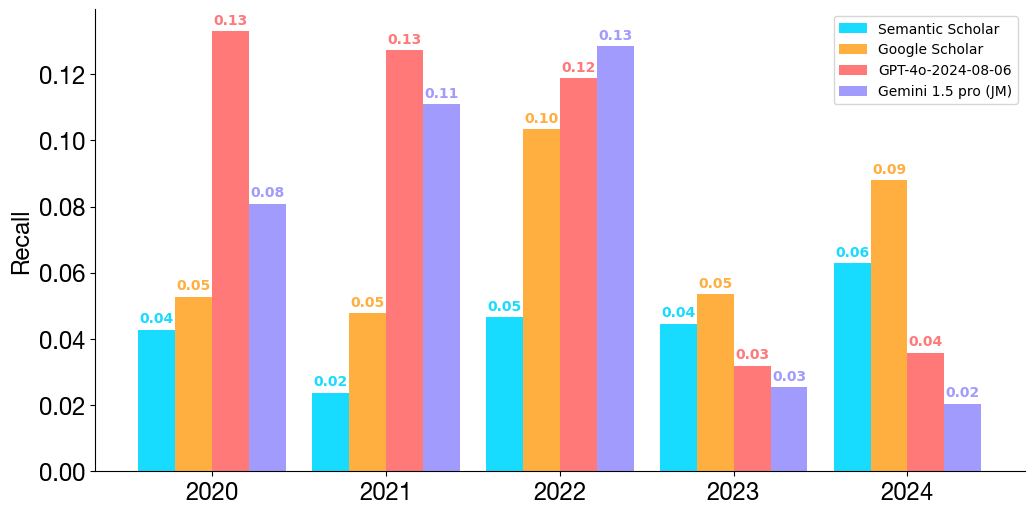

In [31]:
df = format_to_df(table_years, "recall", ["Semantic Scholar", "Google Scholar", "GPT-4o-2024-08-06", "Gemini 1.5 pro (JM)"])
draw_bar_plot(df, ylabel="Recall")

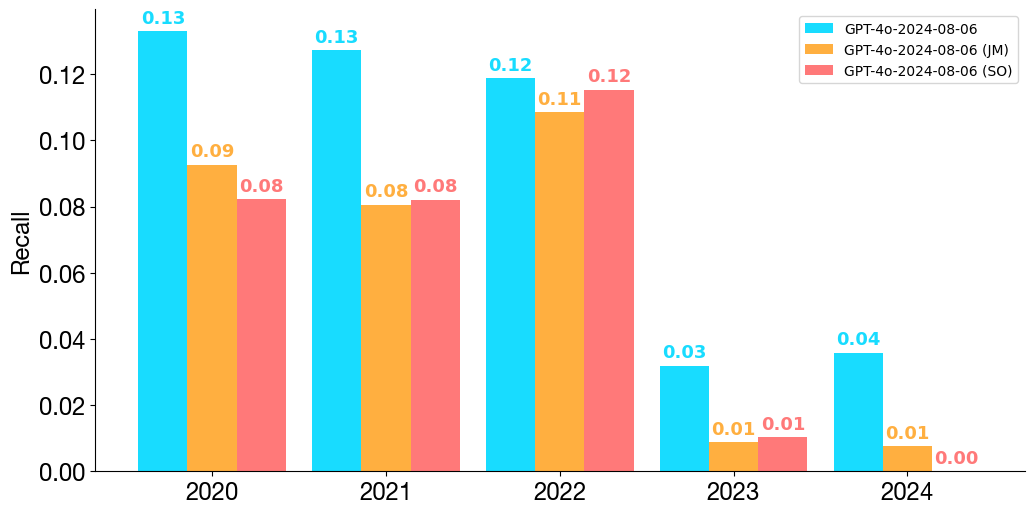

In [32]:
df = format_to_df(table_years, "recall", ["GPT-4o-2024-08-06", "GPT-4o-2024-08-06 (JM)", "GPT-4o-2024-08-06 (SO)"])
draw_bar_plot(df, ylabel="Recall")

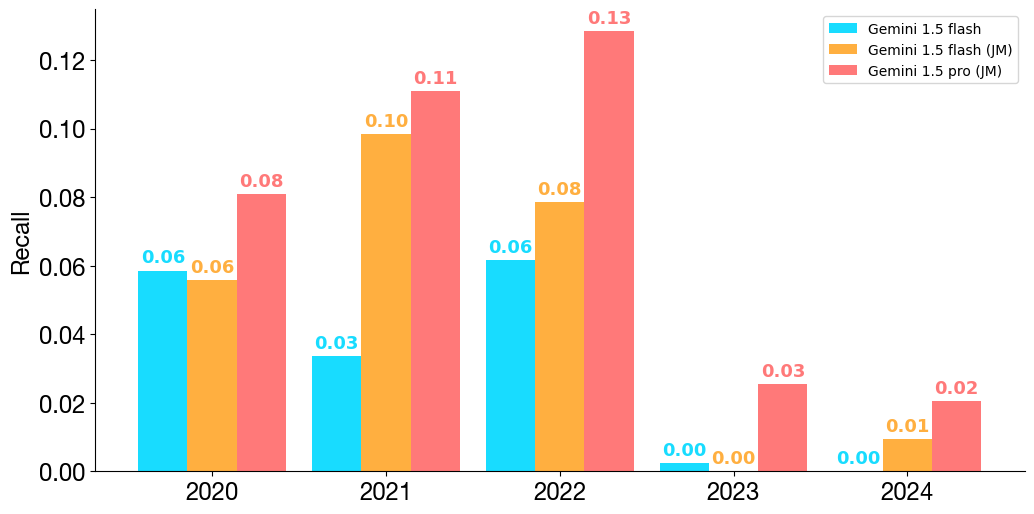

In [33]:
df = format_to_df(table_years, "recall", ["Gemini 1.5 flash", "Gemini 1.5 flash (JM)", "Gemini 1.5 pro (JM)"])
draw_bar_plot(df, ylabel="Recall")

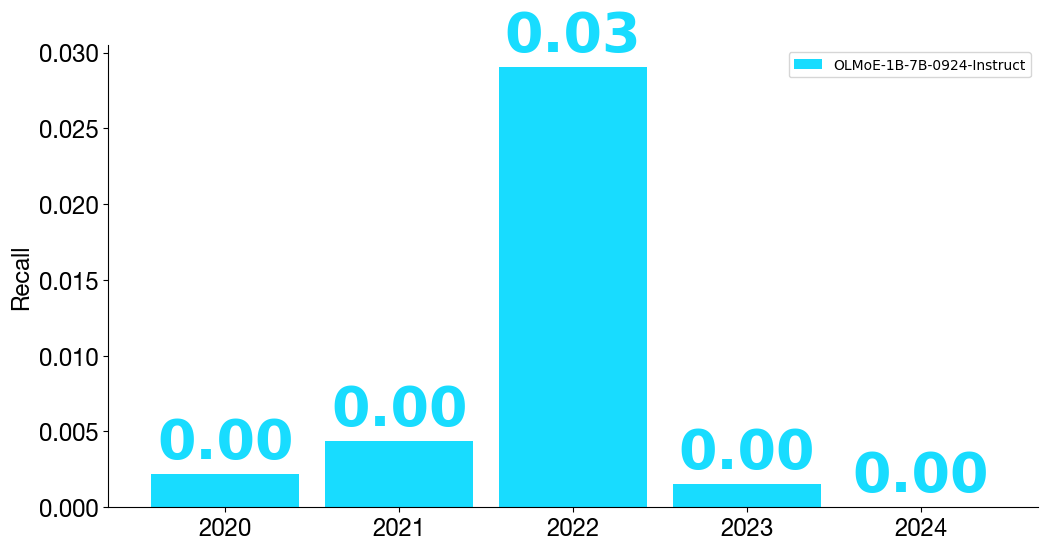

In [34]:
df = format_to_df(table_years, "recall", ["OLMoE-1B-7B-0924-Instruct"])
draw_bar_plot(df, ylabel="Recall")